Fuzzy number algebra

In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
%matplotlib inline

In [78]:
def create_potential_buyer_tolerance():
    p = [ np.random.randint(0,6) for _ in range(4)]
    return sorted(p)

In [79]:
def add_trapezoidal_fuzzy_numbers(p,q):
    return [x+y for x,y in zip(p,q)]

def rescale_trapezoidal_fuzzy_numbers(p,alpha):
    return [x/alpha for x in p]

In [81]:
create_potential_buyer_tolerance()

[0, 3, 5, 5]

In [82]:
def prepare_plot(p_1,p_2,p_3,p_4, res=20):
    res_end = res + 1
    if p_1 == p_2 :
        y_left_edge = [i/res for i in range(res_end)]
        x_left_edge = [p_1 for _ in range(res_end)]
    else :
        y_left_edge = [i/res for i in range(res_end) ]
        x_left_edge = [p_1 + (p_2-p_1)*i/res for i in range(res_end)]
    if p_2 == p_3:
        y_plateau = [1]
        x_plateau = [p_3]
    else:
        y_plateau = [1 for i in range(res_end) ]
        x_plateau = [p_2 + (p_3-p_2)*i/res for i in range(res_end)]
    if p_3 == p_4:
        y_right_edge = [i/res for i in range(res_end)]
        x_right_edge = [p_3 for i in range(res_end)]
    else:
        y_right_edge = [(1 - i/res) for i in range(res_end)]
        x_right_edge = [p_3 + (p_4-p_3)*i/res for i in range(res_end)]
    x = x_left_edge + x_plateau + x_right_edge
    y = y_left_edge + y_plateau + y_right_edge
    return x, y

In [83]:
def plot_trapezoidal_fuzzy_number(p_1,p_2,p_3,p_4, res=20, set_axes_lim=False):
    x, y = prepare_plot(p_1,p_2,p_3,p_4, res=20)
    if set_axes_lim:
        plt.xlim(0,1.1)
        plt.ylim(0,1.1)
    plt.plot(x,y)

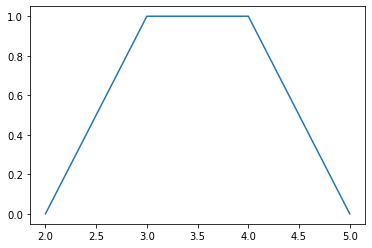

In [84]:
plot_trapezoidal_fuzzy_number(2,3,4,5)

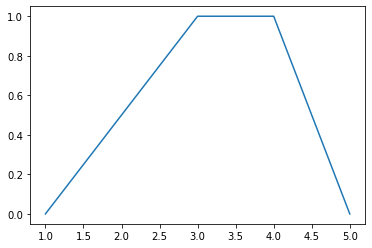

In [92]:
plot_trapezoidal_fuzzy_number(*create_potential_buyer_tolerance())

[4, 5, 10, 10]


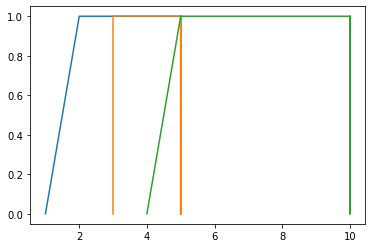

In [93]:
p=(1,2,5,5)
q=(3,3,5,5)
r = add_trapezoidal_fuzzy_numbers(p,q)
print(r)
plot_trapezoidal_fuzzy_number(*p)
plot_trapezoidal_fuzzy_number(*q)
plot_trapezoidal_fuzzy_number(*r)

In [94]:
def generate_potential_buyers(nb_buyers=100):
    return [create_potential_buyer_tolerance() for _ in range(nb_buyers)]


def simulate_buying(p, average_review):
    p_1, p_2 = p[0],p[1]
    if p_1 >= average_review:
        return False
    if p_2 <= average_review:
        return True
    test = p_1 + (p_2-p_1)*np.random.random()
    if test > (p_2 - average_review):
        return True
    else:
        return False

def simulate_buying_prospects(p, average_review):
    p_3, p_4 = p[2],p[3]
    if p_3 >= average_review:
        return False
    if p_4 <= average_review:
        return True
    test = p_3 + (p_4-p_3)*np.random.random()
    if test > (p_4 - average_review):
        return True
    else:
        return False

    
def simulate_potential_buyers_behavior(average_review, nb_buyers=100):
    potential_buyers = generate_potential_buyers(nb_buyers=nb_buyers)
    actual_buyers = [ p for p in potential_buyers if simulate_buying(p, average_review)]
    result = [0,0,0,0]
    for actual_buyer in actual_buyers:
        result = add_trapezoidal_fuzzy_numbers(actual_buyer,result)
    return rescale_trapezoidal_fuzzy_numbers(result, 5*len(actual_buyers)), potential_buyers, actual_buyers


def simulate_prospects_behavior(average_review, nb_buyers=50):
    prospect_buyers = generate_potential_buyers(nb_buyers=nb_buyers)
    actual_buyers = [ p for p in prospect_buyers if simulate_buying_prospects(p, average_review)]
    result = [0,0,0,0]
    for actual_buyer in actual_buyers:
        result = add_trapezoidal_fuzzy_numbers(actual_buyer,result)
    return rescale_trapezoidal_fuzzy_numbers(result, 5*len(actual_buyers)), potential_buyers, actual_buyers



def simulate_site_visitors_behavior(average_review, nb_visitors, prospects_ratio=0.2):
    nb_prospects = int(round(nb_visitors*prospects_ratio,0))
    nb_buyers = nb_visitors - nb_prospects
    prospect_buyers = generate_potential_buyers(nb_buyers=nb_prospects)
    potential_buyers = generate_potential_buyers(nb_buyers=nb_buyers)
    actual_prospect_buyers = [ p for p in prospect_buyers if simulate_buying_prospects(p, average_review)]
    actual_potential_buyers = [ p for p in potential_buyers if simulate_buying(p, average_review)]
    actual_buyers = actual_prospect_buyers + actual_potential_buyers
    result = [0,0,0,0]
    for actual_buyer in actual_buyers:
        result = add_trapezoidal_fuzzy_numbers(actual_buyer,result)
    return rescale_trapezoidal_fuzzy_numbers(result, 5*len(actual_buyers)), actual_prospect_buyers, actual_potential_buyers
    

In [95]:
average_review = 3.5
result, actual_prospect_buyers, actual_potential_buyers = simulate_site_visitors_behavior(average_review, 
                                                                                          nb_visitors=20000, 
                                                                                          prospects_ratio=0.2)

In [96]:
len(actual_prospect_buyers), len(actual_potential_buyers)

(2355, 15742)

In [97]:
result

[0.13793446427584682, 0.356478974415649, 0.59388848980494, 0.8380836602751838]

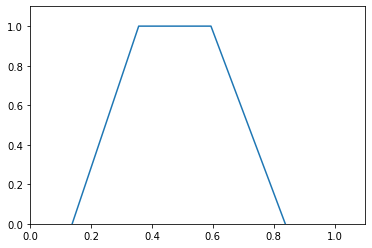

In [98]:
plot_trapezoidal_fuzzy_number(*result, set_axes_lim=True)

In [102]:
step = 0.01
mean_reviews = [0.5 + i*step for i in range(401)]
print(min(mean_reviews), max(mean_reviews))
p_1 = []
p_2 = []
p_3 = []
p_4 = []
for mr in mean_reviews:
    p, _, _ = simulate_site_visitors_behavior(mr, nb_visitors=20000, prospects_ratio=0.2)
    p_1.append(p[0])
    p_2.append(p[1])
    p_3.append(p[2])
    p_4.append(p[3])

0.5 4.5


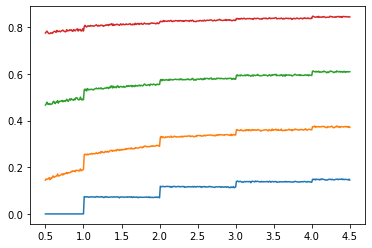

In [103]:
plt.plot(mean_reviews, p_1)
plt.plot(mean_reviews, p_2)
plt.plot(mean_reviews, p_3)
plt.plot(mean_reviews, p_4);

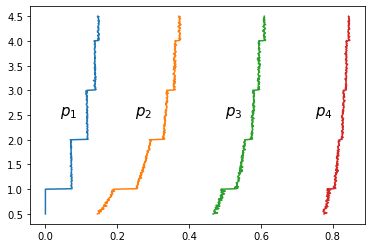

In [105]:
plt.plot(p_1, mean_reviews, label="p_1")
plt.plot(p_2, mean_reviews, label="p_2")
plt.plot(p_3, mean_reviews, label="p_3")
plt.plot(p_4, mean_reviews, label="p_4")
plt.text(0.04,2.5,'$p_1$',fontsize=15)
plt.text(0.25,2.5,'$p_2$',fontsize=15)
plt.text(0.5,2.5,'$p_3$',fontsize=15)
plt.text(0.75,2.5,'$p_4$',fontsize=15);